In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()
#Pclass - класс билета(соц. статус): 1-Высокий, 2-Средний, 3-Низкий
#Fare - пассажирский тариф
#SibSp - кол-во братьев и мужей/жен на борту
#Parch - кол-во родителей и детей на борту
#Cabin - номер каюты
#Embarked - порт посадки: C-Cherbourg, Q-Queenstown, S-Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

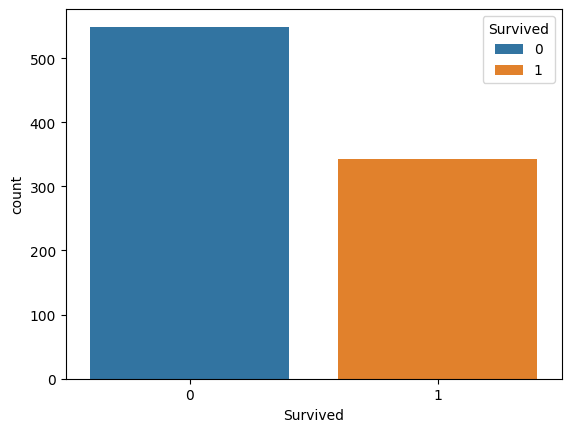

In [4]:
#Классы достаточно сбалансированы
sns.countplot(data=data, x='Survived', hue='Survived')

In [5]:
#Sex - 0-male, 1-female
#Embarked - порт посадки: 0(C)-Cherbourg, 1(Q)-Queenstown, 2(S)-Southampton
corr_data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
corr_data['Sex'] = corr_data['Sex'].map({'male': 0, 'female': 1})
corr_data['Embarked'] = corr_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<Axes: >

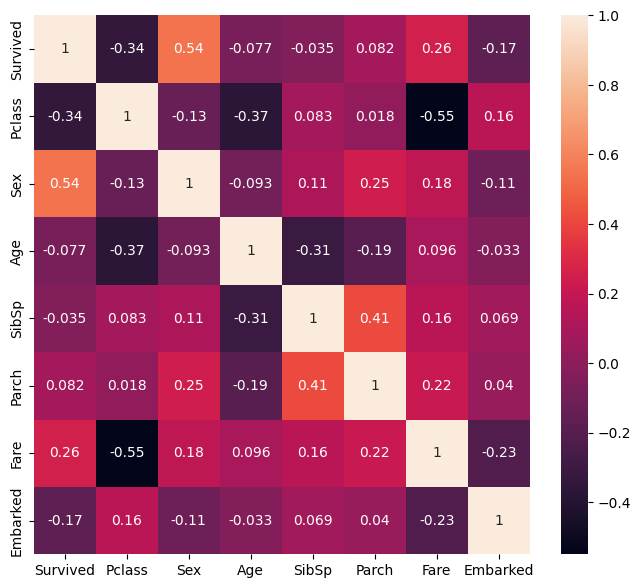

In [6]:
plt.figure(figsize=(8,7), dpi=100)
sns.heatmap(corr_data.corr(), annot=True)

<Axes: xlabel='Fare', ylabel='Age'>

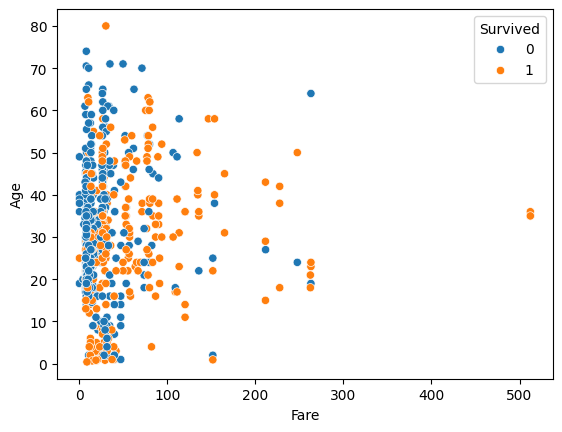

In [3]:
sns.scatterplot(data=data, x='Fare', y='Age', hue='Survived')

In [3]:
#Dataset без слабокор. признаков
data_1 = data.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'Cabin'], axis=1)
data_1['Embarked'] = data_1['Embarked'].fillna('S')
data_1 = pd.get_dummies(data_1)
X = data_1.drop('Survived', axis=1)
y = data_1['Survived']

In [4]:
#Тестовая и обучающая выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#Подготовка Pipeline с моделью и набора гиперпараметров

In [26]:
#Логистическая регресиия
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000, solver='saga')
pipe_model = Pipeline([('scaler', scaler), ('model', model)])
grid_param = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [0.01,0.1,1,5,10,11,12,15,20,25,30,50,100],
              'model__l1_ratio': [0, 0.01, 0.1, 0.2, 0.5, 0.7, 1]}

In [5]:
#K-ближайших соседей
scaler = StandardScaler()
model = KNeighborsClassifier()
pipe_model = Pipeline([('scaler', scaler), ('model', model)])
grid_param = {'model__n_neighbors': list(range(1,40))}

In [11]:
#SVM
scaler = StandardScaler()
model = SVC()
pipe_model = Pipeline([('scaler', scaler), ('model', model)])
grid_param = {'model__C': [0.01,0.1,1,5,10,11,12,15,20,25,30,50,100],
              'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [15]:
#AdaBoost
model = AdaBoostClassifier()
pipe_model = Pipeline([('model', model)])
grid_param = {'model__n_estimators': list(range(1,50))}

In [30]:
#GradBoost
model = GradientBoostingClassifier()
pipe_model = Pipeline([('model', model)])
grid_param = {'model__n_estimators': list(range(1,50))}

In [31]:
#Обучение модели
grid_model = GridSearchCV(estimator=pipe_model, param_grid=grid_param, scoring='accuracy', cv=5, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ..............................model__n_estimators=1; total time=   0.0s
[CV] END ..............................model__n_estimators=1; total time=   0.0s
[CV] END ..............................model__n_estimators=1; total time=   0.0s
[CV] END ..............................model__n_estimators=1; total time=   0.0s
[CV] END ..............................model__n_estimators=1; total time=   0.0s
[CV] END ..............................model__n_estimators=2; total time=   0.0s
[CV] END ..............................model__n_estimators=2; total time=   0.0s
[CV] END ..............................model__n_estimators=2; total time=   0.0s
[CV] END ..............................model__n_estimators=2; total time=   0.0s
[CV] END ..............................model__n_estimators=2; total time=   0.0s
[CV] END ..............................model__n_estimators=3; total time=   0.0s
[CV] END ..............................model__n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11, 12, 13, 14, 15, 16, 17, 18,
                                                 19, 20, 21, 22, 23, 24, 25, 26,
                                                 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=2)

In [ ]:
#Оценка результатов

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.68      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



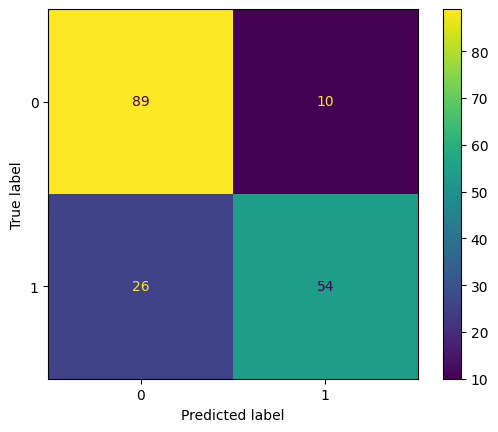

In [10]:
#Логистическая регрессия

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        99
           1       0.91      0.60      0.72        80

    accuracy                           0.79       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.79      0.78       179



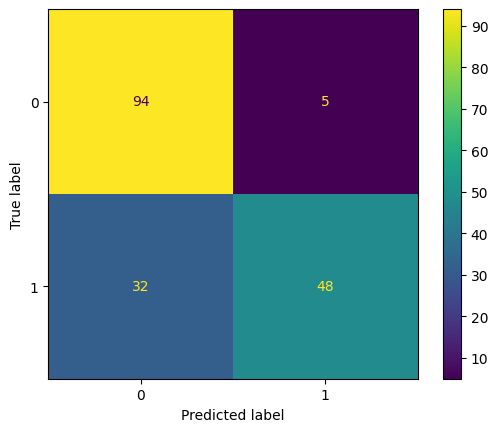

In [7]:
#K-ближайших соседей

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        99
           1       0.96      0.56      0.71        80

    accuracy                           0.79       179
   macro avg       0.85      0.77      0.77       179
weighted avg       0.83      0.79      0.78       179



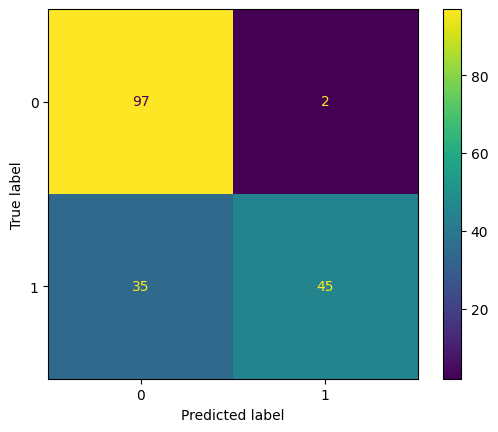

In [13]:
#SVM

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.81      0.68      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



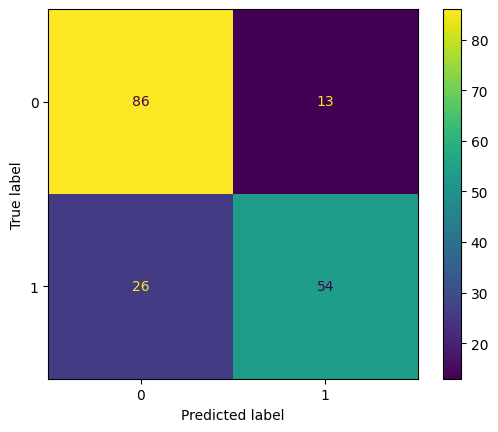

In [17]:
#AdaBoost

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        99
           1       0.91      0.60      0.72        80

    accuracy                           0.79       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.79      0.78       179



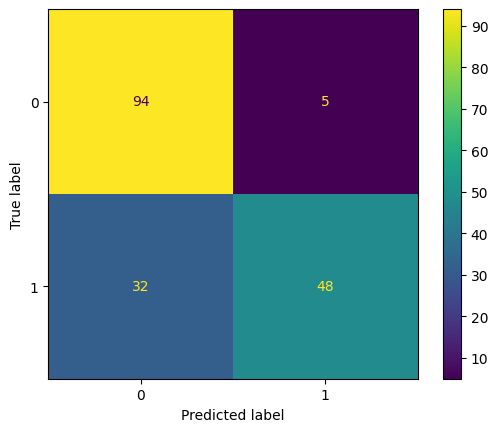

In [24]:
#GradBoost

In [ ]:
y_predict = grid_model.predict(X_test)
print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [28]:
#Значимость признаков
coeff = pd.DataFrame(data=grid_model.best_estimator_['model'].coef_[0], columns=['Coeff'], index=X.columns)

<Axes: xlabel='None', ylabel='Coeff'>

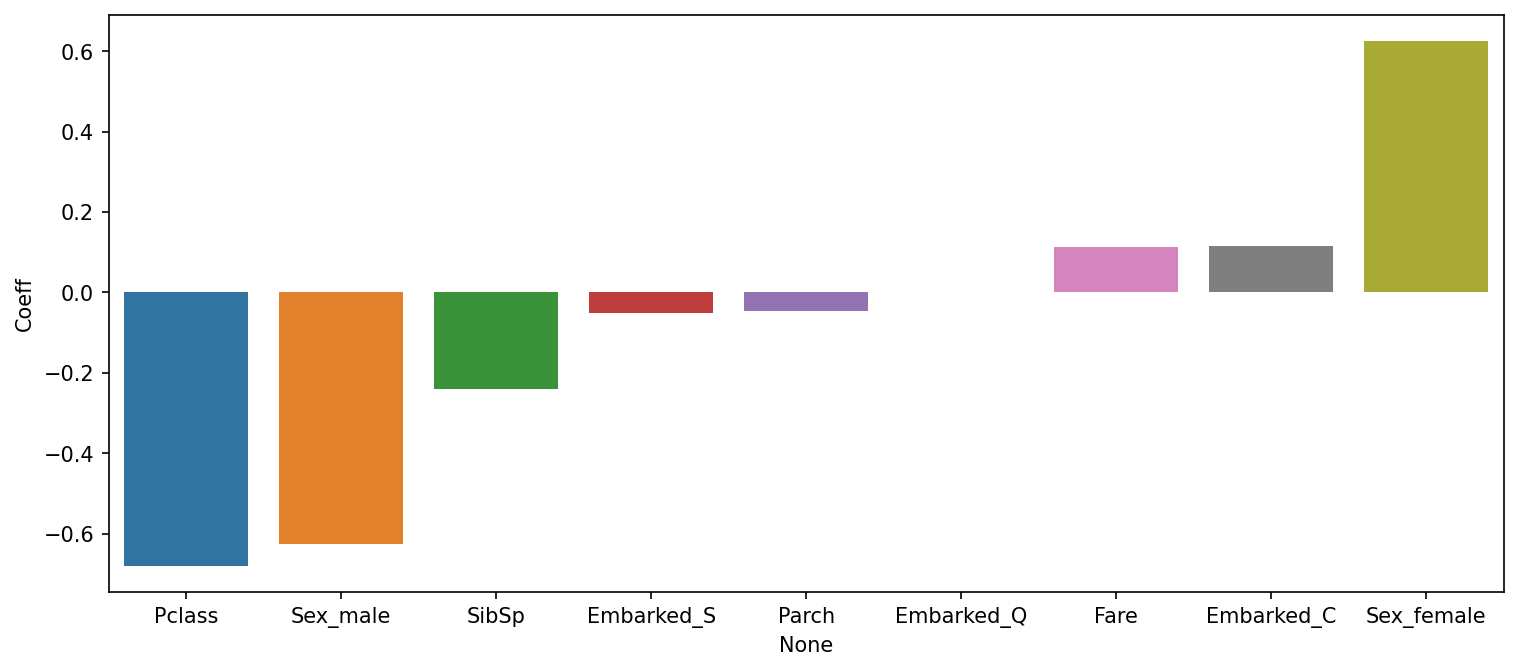

In [29]:
coeff = coeff.sort_values('Coeff')
plt.figure(figsize=(12,5), dpi=150)
sns.barplot(data=coeff, x=coeff.index, y='Coeff', hue=coeff.index)

In [33]:
#Результаты

In [61]:
res_data = pd.read_csv('test.csv')

In [62]:
X_res = res_data.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'Cabin'], axis=1)
fare_mean = res_data[res_data['Pclass']==3]['Fare'].mean()
X_res['Fare'] = X_res['Fare'].fillna(fare_mean)
X_res = pd.get_dummies(X_res)

In [65]:
y_res = grid_model.predict(X_res)

In [73]:
result = pd.concat([res_data['PassengerId'], pd.DataFrame(y_res, columns=['Survived'])], axis=1)

In [77]:
result.to_csv('Result.csv', index=False)